In [1]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('hotel_bookings.csv')

In [3]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.drop(['company'],inplace=True,axis=1)

In [7]:
df.dropna(subset=['children'],inplace=True)

In [8]:
df.shape

(119386, 31)

In [9]:
df.agent.value_counts().reset_index()

,index,agent
0,9.0,31960
1,240.0,13922
2,1.0,7191
3,14.0,3639
4,7.0,3539
...,...,...
328,289.0,1
329,432.0,1
330,265.0,1
331,93.0,1


In [10]:
df.agent.median()

14.0

In [11]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()
imputer.fit(df[['agent']])

KNNImputer()

In [12]:
imputer.transform(df[['agent']])

array([[86.69484124],
       [86.69484124],
       [86.69484124],
       ...,
       [ 9.        ],
       [89.        ],
       [ 9.        ]])

In [13]:
df.agent.fillna(df['agent'].median(),inplace=True)

In [14]:
from sklearn.impute import SimpleImputer
simputer=SimpleImputer(strategy='most_frequent')
simputer.fit(df[['country']])

SimpleImputer(strategy='most_frequent')

In [15]:
df['country']=simputer.transform(df[['country']])

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### EDA

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x21312646500>,
 [Text(-0.5433519992196014, 0.9564353637042402, 'City Hotel'),
  Text(0.5433519096716575, -0.9564354145765218, 'Resort Hotel')],
 [Text(-0.2963738177561462, 0.5216920165659492, '66.4%'),
  Text(0.29637376891181316, -0.5216920443144664, '33.6%')])

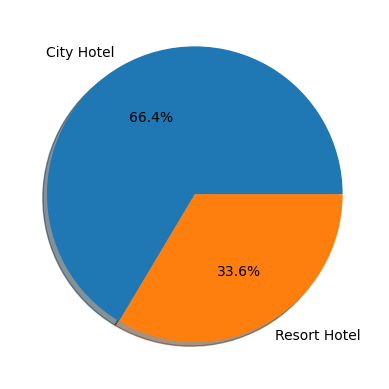

In [19]:
plt.pie(df['hotel'].value_counts().values,labels=df['hotel'].value_counts().index,shadow=True,autopct='%1.1f%%')

1. 66% people booking City Hotel

<AxesSubplot: xlabel='is_canceled', ylabel='count'>

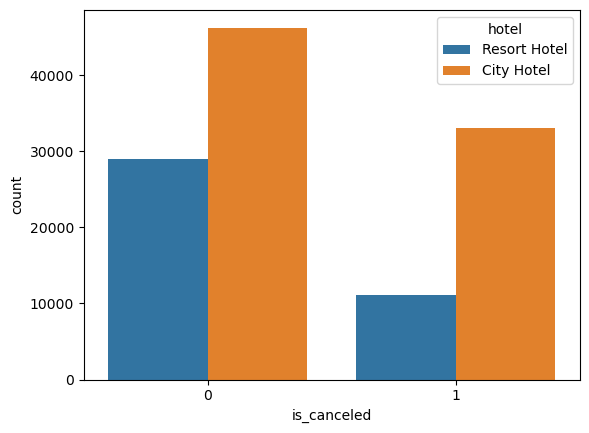

In [20]:
sb.countplot(data=df,x='is_canceled',hue='hotel')

In [21]:
df.is_canceled.value_counts()/df.shape[0]

0    0.629605
1    0.370395
Name: is_canceled, dtype: float64

--> 63% of bookings are not canceled 

<AxesSubplot: xlabel='reserved_room_type', ylabel='count'>

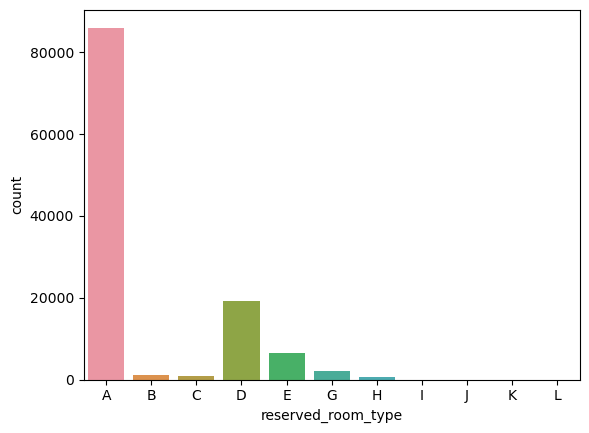

In [22]:
sb.countplot(data=df,x='reserved_room_type',order='ABCDEGHIJKL')

<AxesSubplot: xlabel='assigned_room_type', ylabel='count'>

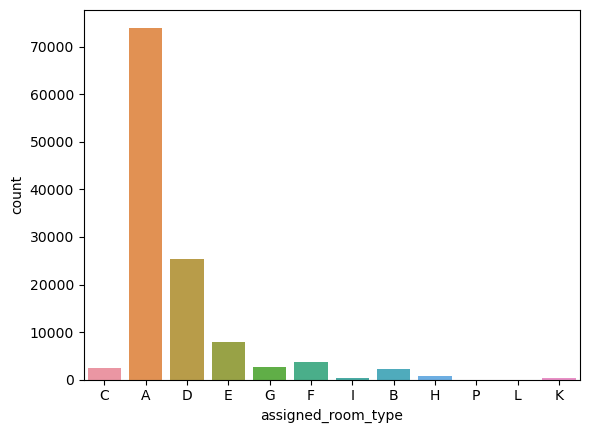

In [23]:
sb.countplot(data=df,x='assigned_room_type')

--> Most of bookings reserved room type are "A" category

<AxesSubplot: xlabel='adults', ylabel='count'>

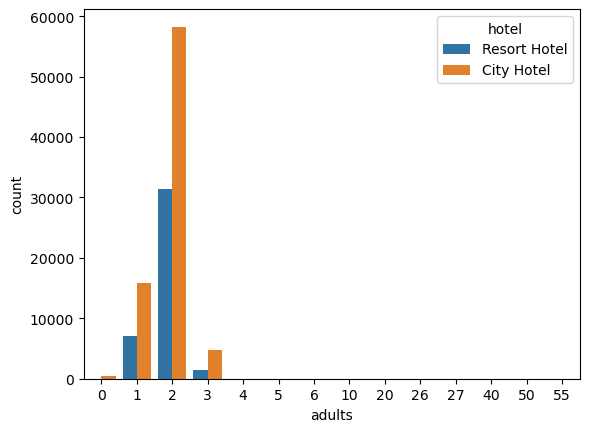

In [24]:
sb.countplot(data=df,x='adults',hue='hotel')

1. Most of the booking rooms are taken by 2 adult persons.
2. Most of the adults booked city hotel

<AxesSubplot: xlabel='babies', ylabel='count'>

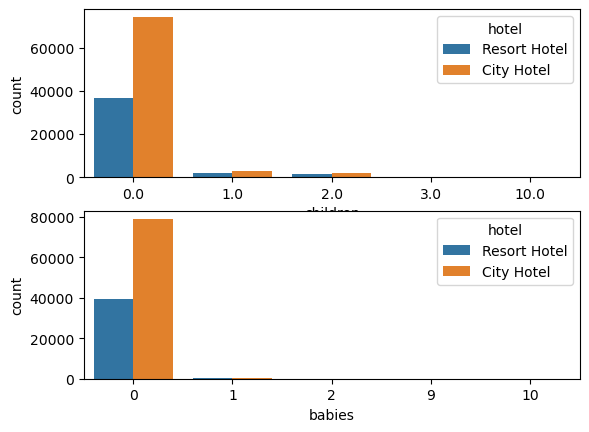

In [25]:
plt.subplot(2,1,1)
sb.countplot(data=df,x='children',hue='hotel')
plt.subplot(2,1,2)
sb.countplot(data=df,x='babies',hue='hotel')

--> Most of persons didn't bring their childrens along with them or other reasons. If they do, then only one or 2 childs, babies

In [26]:
df.reservation_status.value_counts()/df.shape[0]

Check-Out    0.629605
Canceled     0.360285
No-Show      0.010110
Name: reservation_status, dtype: float64

<AxesSubplot: xlabel='hotel', ylabel='lead_time'>

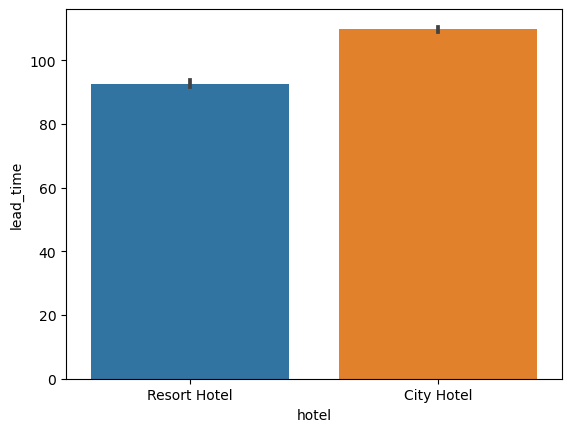

In [27]:
sb.barplot(x='hotel',y='lead_time',data=df)

--> City Hotel bookings has the little bit higher than Resort hotel

In [28]:
df.arrival_date_week_number.value_counts()

33    3579
30    3087
32    3042
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64

In [29]:
df.arrival_date_month.value_counts()

August       13873
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [30]:
df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21992
Name: arrival_date_year, dtype: int64

<AxesSubplot: xlabel='arrival_date_year', ylabel='count'>

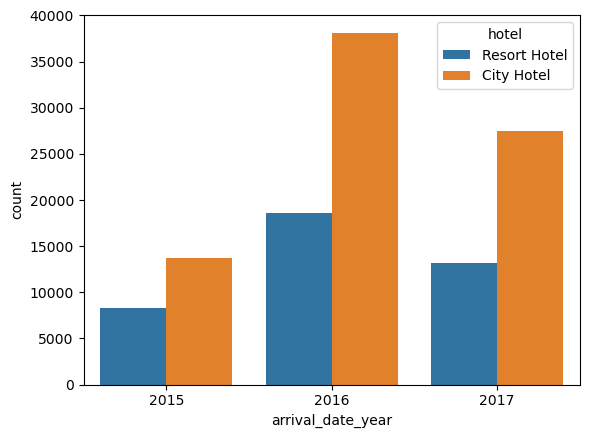

In [31]:
sb.countplot(data=df,x='arrival_date_year',hue='hotel')

--> Most of the hotel rooms are booked in 2016 and city hotels are mostly filled in every year

<AxesSubplot: xlabel='is_repeated_guest', ylabel='count'>

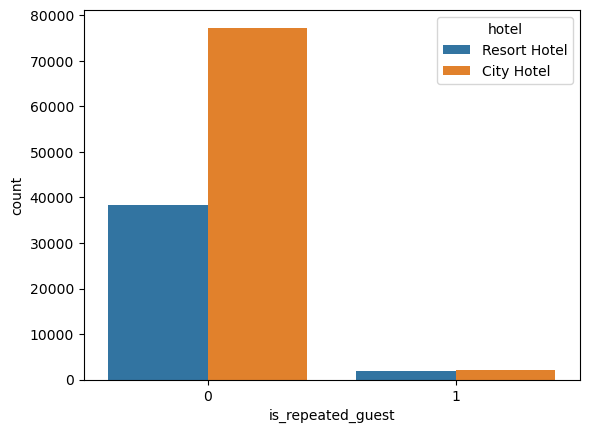

In [32]:
sb.countplot(data=df,x='is_repeated_guest',hue='hotel')

--> Most of the visitors are not visiting, Below 2000 guests only visiting repeatedly

C:\Users\hemanth\AppData\Local\Temp\ipykernel_5640\421569888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True)


<AxesSubplot: >

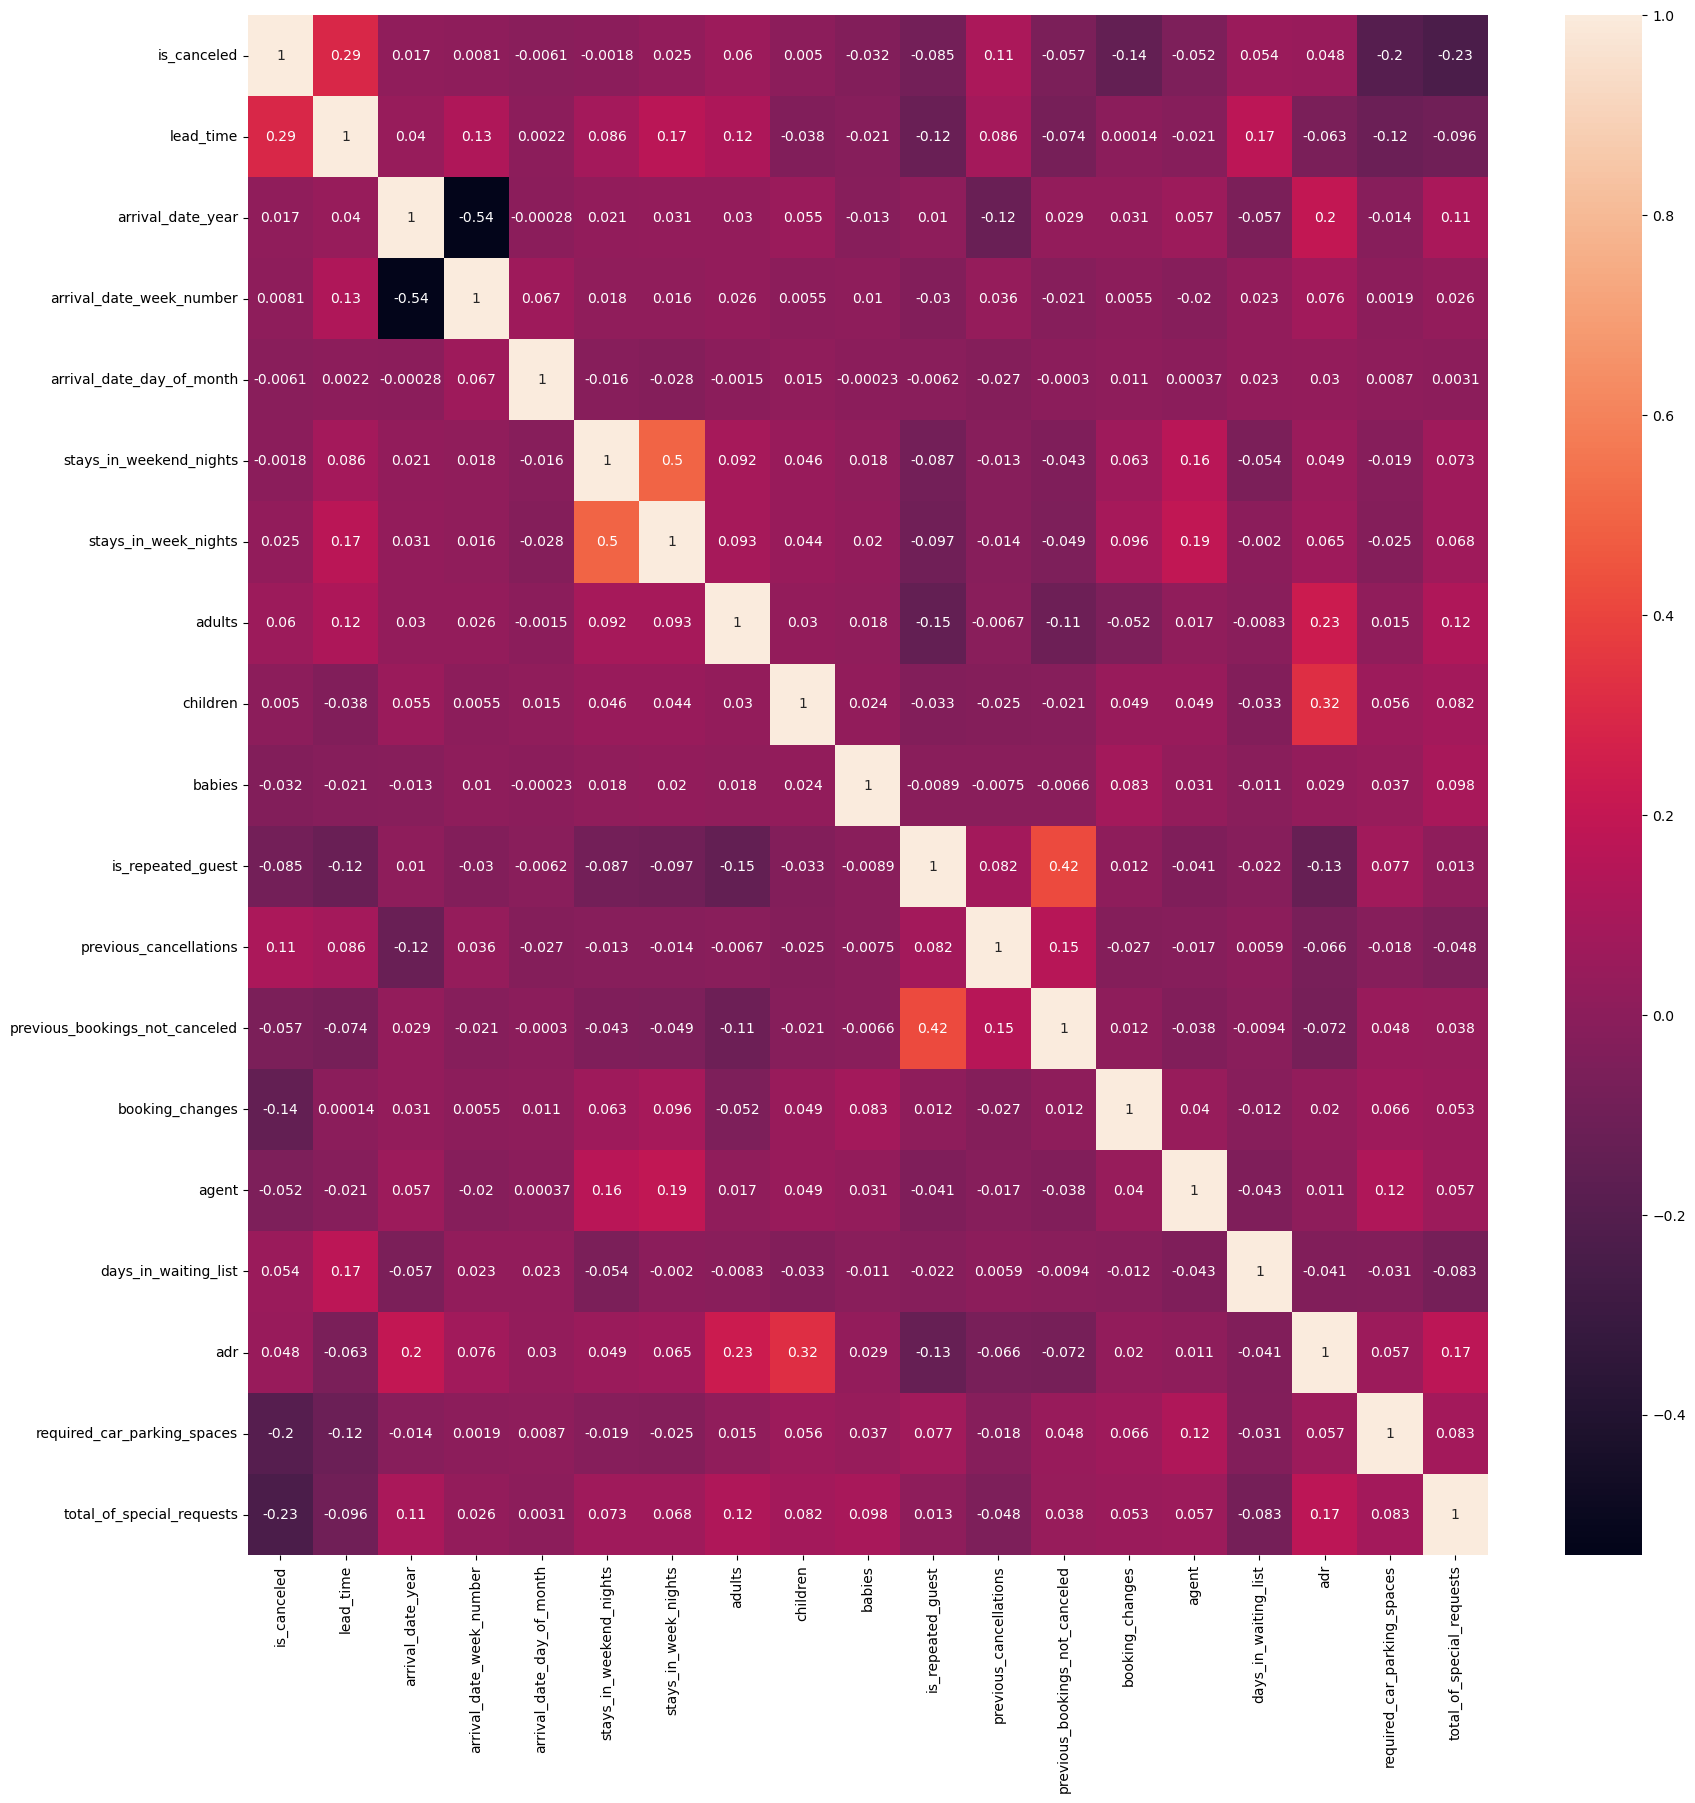

In [33]:
plt.figure(figsize=(20,20))
sb.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

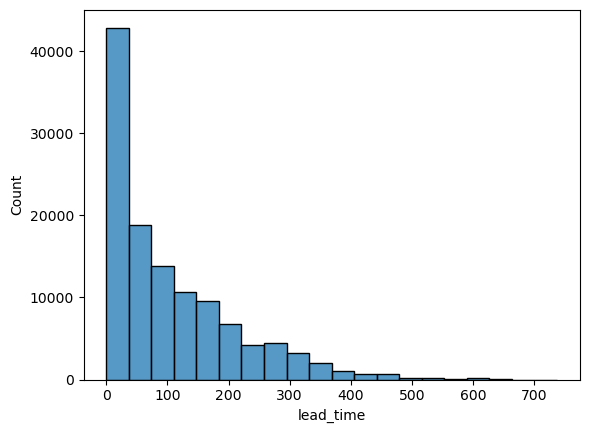

In [34]:
sb.histplot(df.lead_time,bins=20)

---> Right skewed

<AxesSubplot: >

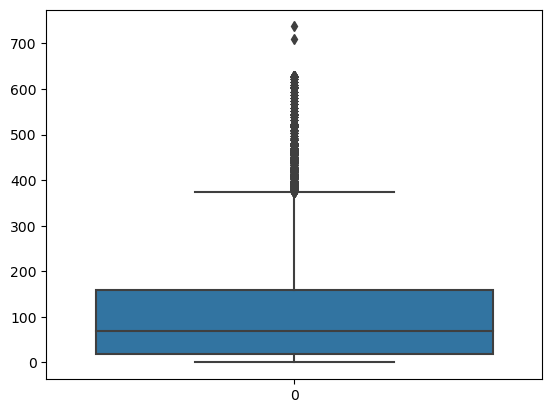

In [35]:
sb.boxplot(df.lead_time)

<AxesSubplot: xlabel='arrival_date_month', ylabel='count'>

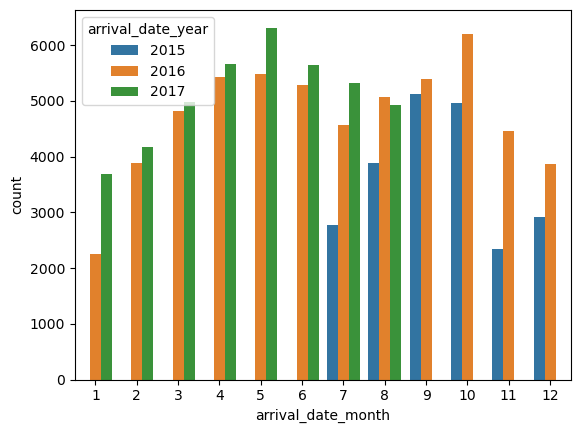

In [45]:
sb.countplot(data=df,x='arrival_date_month',hue='arrival_date_year')

1. In 2015, from jan to june there is no hotel bookings
2. In 2017, May month has highest bookings and in 2016, Oct month has highest bookings 

In [58]:
num_fea=[fea for fea in df.columns if df[fea].dtype!='O']

In [74]:
num_fea

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [84]:
df.arrival_date_month.value_counts()

8     13873
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64

#### Encoding

In [40]:
Months={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [42]:
df['arrival_date_month']=df.arrival_date_month.map(Months)

In [43]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [91]:
df.arrival_date_day_of_month.value_counts()

17    4406
5     4315
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3854
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3744
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64